# Иллюстрации для статьи «Алгоритмы поиска аномалий HBOS и ECOD»

In [65]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pyod.models.hbos import HBOS

In [66]:
base_color = '#6e81eb'
light_color = '#f5f1ff'
dark_color = '#38367f'
background_color = '#f5f1ff'

In [67]:
dpi = 150

In [68]:
linewidth = 2

In [69]:
np.random.seed(42)

In [70]:
df = pd.DataFrame(np.random.normal(0, 1, 100000), columns=['данные'])

In [71]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.set(rc={'axes.facecolor': background_color, 
            'axes.edgecolor': dark_color,
            'figure.facecolor': background_color, 
            'grid.color': '#b0b0b0',
            'axes.labelcolor': dark_color,
            'xtick.color': dark_color,
            'ytick.color': dark_color})

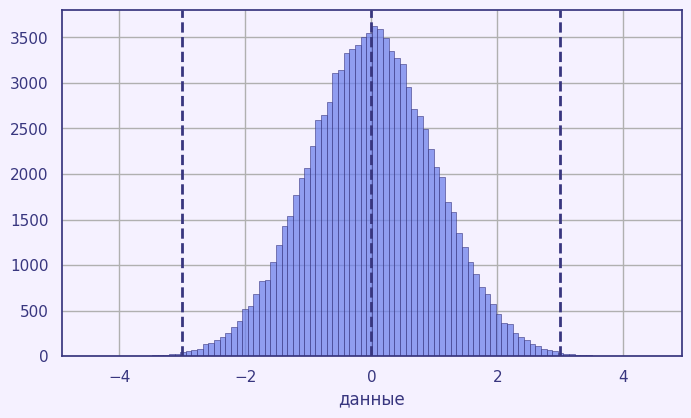

In [72]:
plt.figure(figsize=(8, 4.5))
ax = sns.histplot(df, x='данные', bins=100, color=base_color, edgecolor=dark_color)
ax.set(ylabel='')
plt.axvline(3, linestyle='--', color=dark_color, linewidth=linewidth)
plt.axvline(0, linestyle='--', color=dark_color, linewidth=linewidth)
plt.axvline(-3, linestyle='--', color=dark_color, linewidth=linewidth)
plt.savefig("imgs/img_1.png", dpi=dpi, bbox_inches='tight', transparent=False)

In [73]:
df_young = pd.DataFrame(np.random.normal(24, 1, 100), columns=['возраст'])

In [74]:
df_old = pd.DataFrame(np.random.normal(60, 4, 200), columns=['возраст'])

In [75]:
df_norm = pd.DataFrame(np.random.normal(35, 4, 5), columns=['возраст'])

In [76]:
df_comb = pd.concat([df_young, df_old, df_norm])

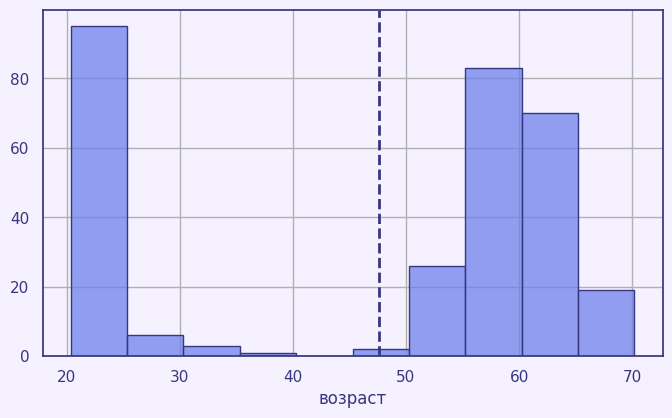

In [77]:
plt.figure(figsize=(8, 4.5))
ax = sns.histplot(df_comb, bins=10, x='возраст', color=base_color, edgecolor=dark_color)
ax.set(ylabel='')
plt.axvline(df_comb['возраст'].mean().item(), linestyle='--', color=dark_color, linewidth=linewidth)
plt.savefig("imgs/img_2.png", dpi=dpi, bbox_inches='tight', transparent=False)

In [78]:
model = HBOS(n_bins=10)

In [79]:
model.fit(df_comb['возраст'].values.reshape(-1, 1))

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [80]:
y_train_scores = model.decision_scores_

In [81]:
y_train_scores = model.decision_scores_

In [82]:
palette = f"blend:{base_color},{light_color}"

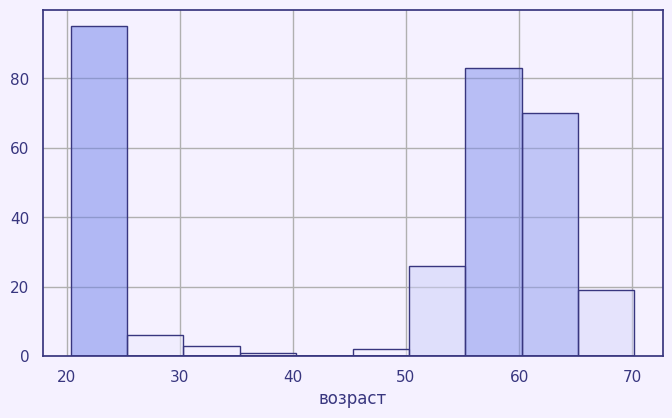

In [83]:
plt.figure(figsize=(8, 4.5))
ax = sns.histplot(df_comb, bins=10, x='возраст', hue=y_train_scores.round(3), legend=False, 
                  palette=sns.color_palette(palette, as_cmap=True), edgecolor=dark_color)
ax.set(ylabel='')
plt.savefig("imgs/img_3.png", dpi=dpi, bbox_inches='tight', transparent=False)